In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

from keras.preprocessing.image import ImageDataGenerator
from matplotlib.image import imread

warnings.filterwarnings('ignore')
os.environ['KMP_DUPLICATE_LIB_OK']='True' # to prevent kernel from terminating
%matplotlib inline

In [2]:
data_dir = 'D:\downloads\catdogs dataset'

In [3]:
os.listdir(data_dir)

['test_set', 'training_set']

In [4]:
test_path = data_dir+'\\test_set\\'

In [5]:
train_path = data_dir+'\\training_set\\'

In [6]:
os.listdir(train_path)

['cats', 'dogs']

In [7]:
os.listdir(train_path+'cats')[9]

'cat.1006.jpg'

In [8]:
cat_img = train_path+'cats\\'+'cat.1005.jpg'

In [9]:
cat_img

'D:\\downloads\\catdogs dataset\\training_set\\cats\\cat.1005.jpg'

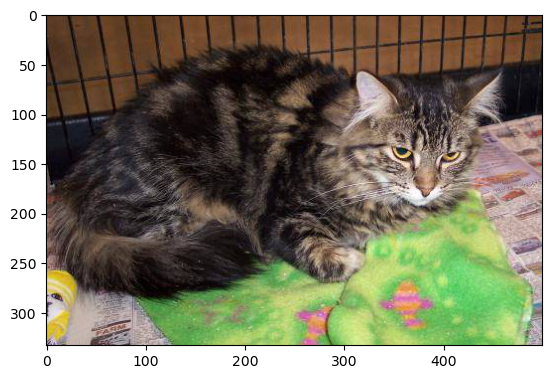

In [10]:
plt.imshow(imread(cat_img))

In [11]:
# Finding the average shape of the images

In [12]:
img1 = []
img2 = []

for img_filename in os.listdir(test_path+'cats'):
    img = imread(test_path+'cats\\'+img_filename)
    d1,d2,colors = img.shape
    img1.append(d1)
    img2.append(d2)

In [13]:
## Checking the distribution of the images

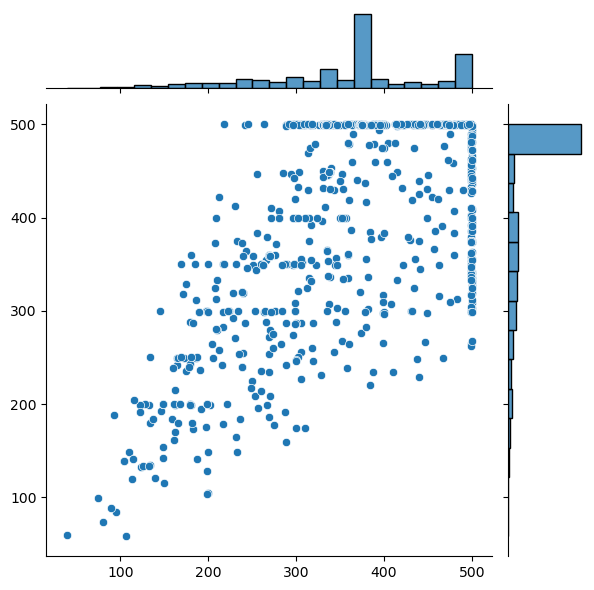

In [14]:
sns.jointplot(x=img1,y=img2)

In [15]:
print("the mean of image in dim1 is : ")
print(np.mean(img1))

the mean of image in dim1 is : 
356.267


In [16]:
print("the mean of image in dim2 is : ")
print(np.mean(img2))

the mean of image in dim2 is : 
413.064


In [17]:
img_shape = (385,385,3)

In [18]:
# preprocessing the Image set by applying transformations and Image argumentations/manipulations

In [19]:
image_gen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [20]:
image_gen.flow_from_directory(train_path)

Found 8000 images belonging to 2 classes.


In [21]:
# image gen from test path

In [22]:
image_gen.flow_from_directory(test_path)

Found 2000 images belonging to 2 classes.


In [23]:
# model creation that will fit a generator

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [25]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),input_shape=img_shape,activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 383, 383, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 191, 191, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 189, 189, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 94, 94, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 92, 92, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 46, 46, 128)      0

In [27]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [28]:
batch_size = 8

In [29]:
# Test set and image set Generators

In [30]:
train_img_gen = image_gen.flow_from_directory(train_path,
                                             target_size=(150, 150),
                                             color_mode='rgb',
                                             batch_size=32,
                                             class_mode='binary')

Found 8000 images belonging to 2 classes.


In [31]:
test_img_gen = image_gen.flow_from_directory(test_path,
                                             target_size=(150,150),
                                             color_mode='rgb',
                                             batch_size=32,
                                             class_mode='binary',
                                            shuffle=False)

Found 2000 images belonging to 2 classes.


In [32]:
train_img_gen.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
results = model.fit_generator(train_img_gen,epochs=20,
                             validation_data=test_img_gen,
                             callbacks=[early_stop]) 
